In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv("cars.csv")

In [20]:
print(data.head())
print(data.isnull().sum())
data.dropna()
print(data.isnull().sum())

   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type  ... Owner_Type Mileage  Engine  Power  Seats    Price
0       1   Toyota  Corolla  2018              50000    Petrol  ...      First      15    1498    108      5   800000
1       2    Honda    Civic  2019              40000    Petrol  ...     Second      17    1597    140      5  1000000
2       3     Ford  Mustang  2017              20000    Petrol  ...      First      10    4951    395      4  2500000
3       4   Maruti    Swift  2020              30000    Diesel  ...      Third      23    1248     74      5   600000
4       5  Hyundai   Sonata  2016              60000    Diesel  ...     Second      18    1999    194      5   850000

[5 rows x 13 columns]
Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats           

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Transmission"]=le.fit_transform(data["Transmission"]) #1-> Manual #0->Automatic
data["Owner_Type"]=le.fit_transform(data["Owner_Type"]) #0-> First #1->Second #2->Third
print(data[["Transmission","Owner_Type"]])

    Transmission  Owner_Type
0              1           0
1              0           1
2              0           0
3              1           2
4              0           1
..           ...         ...
95             0           0
96             1           1
97             1           2
98             0           1
99             1           0

[100 rows x 2 columns]


from sklearn.line

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X = data[["Transmission","Owner_Type"]]
Y = data["Price"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

scaler  = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

model =LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

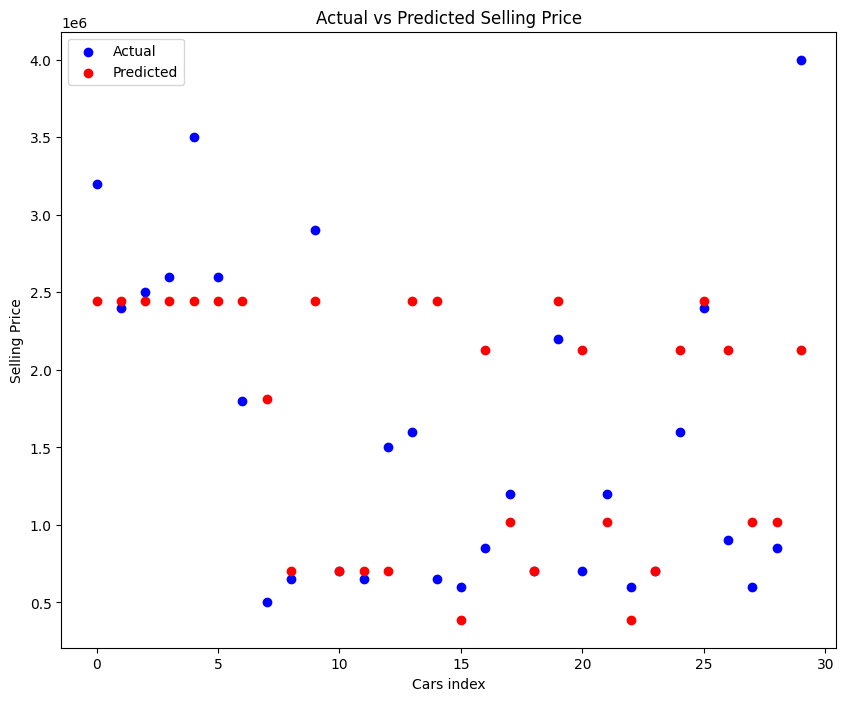

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(range(len(Y_test)),Y_test,label='Actual',color='Blue')
plt.scatter(range(len(y_pred)),y_pred,label='Predicted',color='Red')
plt.title("Actual vs Predicted Selling Price")
plt.xlabel("Cars index")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import root_mean_squared_error
print("RMSE: ", root_mean_squared_error(Y_test,y_pred))

RMSE:  775367.6196854512
